In [39]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math 
import os
%matplotlib inline


# Question 1


**Part I**




In [40]:
path=r'../images/fg.jpg'
fg_raw = cv2.imread(path)
path=r'../images/bg.jpg'
bg_raw = cv2.imread(path)
fg = cv2.cvtColor(fg_raw, cv2.COLOR_BGR2RGB)
bg = cv2.cvtColor(bg_raw, cv2.COLOR_BGR2RGB)

In [41]:
def graft(fg,bg):
  lower_green = np.array([0, 120, 0])     ##[R value, G value, B value]
  upper_green = np.array([170, 255, 150]) 
  mask = cv2.inRange(fg, lower_green, upper_green)
  masked_image = np.copy(fg)
  masked_image[mask != 0] = [255, 255, 255]
  dimension=fg.shape

  cropped_background = bg[0:dimension[0], 0:dimension[1]]
  cropped_background[mask == 0] = [0, 0, 0]
  final_image = cropped_background + masked_image
  return final_image

(-0.5, 1279.5, 719.5, -0.5)

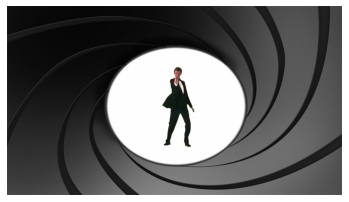

In [42]:
res=graft(fg,bg)
plt.imshow(res)
plt.axis('off')

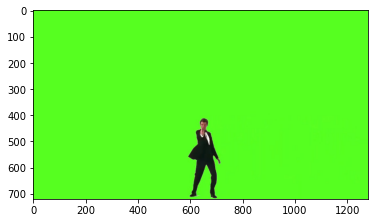

In [43]:
shift =np.copy(fg)
dim=shift.shape
i=dim[0]-1
while (i>180):
  shift[i]=shift[i-180]
  i=i-1
plt.imshow(shift)

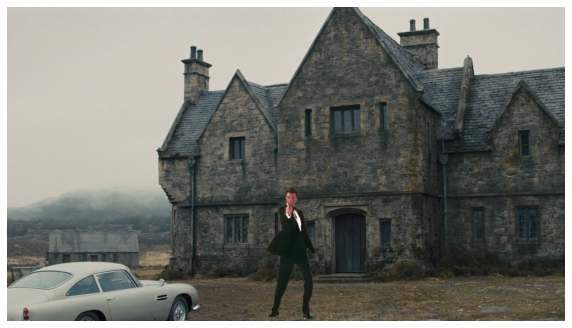

In [44]:
path=r'../images/mansion.jpg'
mansion_raw = cv2.imread(path)
mansion = cv2.cvtColor(mansion_raw, cv2.COLOR_BGR2RGB)

res= graft(shift,mansion)
fig = plt.figure(figsize=[10,10])
plt.imshow(res)
plt.axis('off')
plt.show()

 **Part II**

>$ 1MB = 1024*1024 $ bytes $ $

Given is a RGB image 
>$ 1RGBpixel = 3 $ bytes $ $

Given Dimension of image is $1280*720 $ pixels $ $
>$ $ No of images $ = \frac{Total size}{size of image}$

>$ \implies $ No of images $ = \frac{4*1024*1024*1024}{1280*720*3} = 1553$

# Question 2

>$ 1MB = 1024*1024 $ bytes $ $

Given is a RGB image of square shape
>$ 1RGBpixel = 3 $ bytes $ $

let the dimensions of the image be $x*x$ 
>$ x^2*3 = 168.75 * 1024*1024$

>$ \therefore x = 7680 $

Dimension of image is $ 7680*7680 $ pixels $ $

# Question 3

We Know the Magnification equations of a convex lens as follows
>$ Magnification = \frac{hi}{ho}$

>$Magnification = \frac{-v}{u}$

>$\frac{-v}{u} = \frac{f}{f-u}$

>$\frac{hi}{ho} = \frac{-f}{f-u}$

Here, 

ho -> height of the object

hi -> height of the image

f  -> focal length of the lens

u  -> distance of the object from the lens (in out case 'd')

The values given are,
>$1024*1024 $ pixels $ = 10*10 $ mm $ $

>$ \implies $ pixel length will be $ \frac{10}{1024} $ mm $ $

> $ \therefore hi = \frac{50}{2} * \frac{10}{1024} $ mm $ = 0.244$ cm $ $ 

ho will be half of the given length
> $ \therefore ho = \frac{t}{2} = \frac{32.8}{2} $ cm $ = 16.4 $ cm $  $ 

> $ f = 62.5 $ mm $ $

> $ u = d $

> $ \implies \frac{0.244}{16.4} = \frac{-62.5}{62.5-d}$ 

> $ \therefore d = 42 metres $ 

In [45]:
d=62.5 + ((16.4/0.244)*62.5)
print("Minimum distance is: "+str(int(d))+" cm "+" or "+str(int(d/100))+" metres ")

Minimum distance is: 4263 cm  or 42 metres 


# Question 4

**Part I**

In [46]:
def BitQuantizeImage(im,k):
    om=np.round(im*((2**k-1)/255))
    min=np.amin(om)
    max=np.amax(om)
    out=np.round(255*(om-min)/(max-min))
    return out.astype(np.uint8)

**Part II**

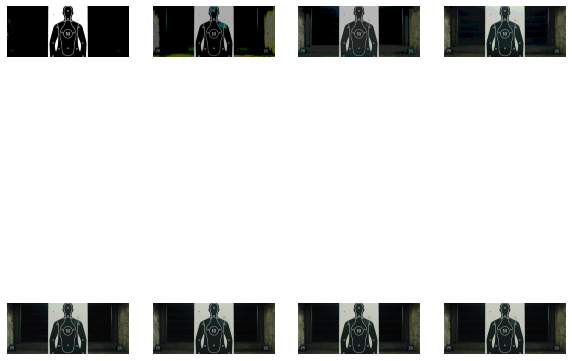

In [47]:
test_raw = cv2.imread('../images/007_test1.png')
test = cv2.cvtColor(test_raw,cv2.COLOR_BGR2RGB)
fig=plt.figure(figsize=[10,10])
for i in range(1,9):
  out = BitQuantizeImage(test,i)
  ax1 = fig.add_subplot(2,4,i)
  ax1.imshow(out,cmap='gray')
  plt.axis('off')
plt.show()

**Part III**

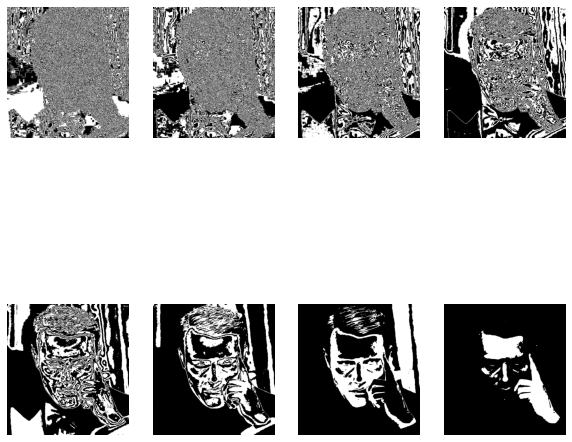

In [48]:
test_raw = cv2.imread('../images/007_test2.png')
test = cv2.cvtColor(test_raw,cv2.COLOR_BGR2GRAY)
fig=plt.figure(figsize=[10,10])
for i in range(8):
  out = test & pow(2,i);
  ax1 = fig.add_subplot(2,4,i+1)
  ax1.imshow(out,cmap='gray')
  plt.axis('off')
plt.show()

**Part IV**

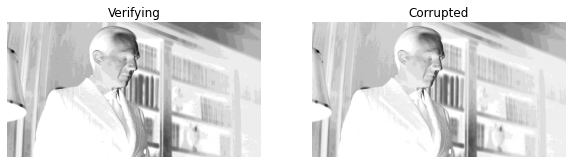

In [49]:
# my_roll = 2018102032 , therefore k=2 ,so mallory
mallory_raw = cv2.imread('../images/mallory.jpg')
mallory = cv2.cvtColor(mallory_raw,cv2.COLOR_BGR2GRAY)
mallory_corrupt_raw = cv2.imread('../images/mallory_corrupt.jpg')
mallory_corrupt = cv2.cvtColor(mallory_corrupt_raw,cv2.COLOR_BGR2RGB)

out = BitQuantizeImage(mallory_corrupt,4)
check = 255-out

fig=plt.figure(figsize=[10,10])

ax = fig.add_subplot(1,2,1)
ax.set_title('Verifying')
ax.imshow(out,cmap='gray')
plt.axis('off')

ax = fig.add_subplot(1,2,2)
ax.set_title('Corrupted')
ax.imshow(mallory_corrupt)
plt.axis('off')
plt.show()


The corruption process is detected as :

1.BitQuantized to 4 bits 

2.Negative on quantized

# Question 5

In [50]:
def linContrastStretching(im,a,b):
    min = np.amin(im)
    max = np.amax(im)
    res = (im - min)*((b-a)/(max - min)) + a
    return res.astype(np.uint8)

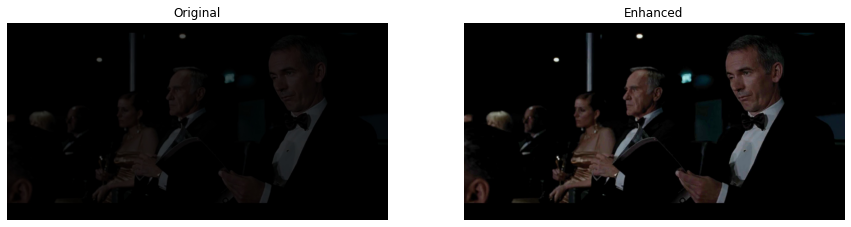

In [51]:
bad_raw = cv2.imread('../images/quantum_bad.jpg')
bad = cv2.cvtColor(bad_raw,cv2.COLOR_BGR2RGB)
res = linContrastStretching(bad,0,255)
fig=plt.figure(figsize=[15,15])
ax = fig.add_subplot(1,2,1)
ax.set_title('Original')
ax.imshow(bad)
plt.axis('off')

ax = fig.add_subplot(1,2,2)
ax.set_title('Enhanced')
ax.imshow(res)
plt.axis('off')
plt.show()

In [52]:
print("min of bad image: ",np.min(bad))
print("max of bad image: ",np.max(bad))

min of bad image:  0
max of bad image:  82


**Contrast Straching :**

>Given a Image which has a pixel intensities in range [$a_{low}$,$a_{high}$],  We can strech this range to [$a_{min}$,$a_{max}$], there by resulting in varying contrast.

>In our current problem our image has values between [0,82] there by resulting a darker image and We streched this to [0,255]

It is acheived by,
> $ a_{new} = a_{min} + (a- a_{low})*\frac{a_{max}-a_{min}}{a_{high}-a_{low}}$

> It is clear from the above formula that intensities will spread out from a smaller range to wider range. and also the streching of $a_{high}$ to $a_{max}$ assures the increase in brightness


# Question 6

**Part I**


In [53]:

def histEqualization(img,ret_cdf=False):
    img = img.astype(np.uint8)
    arr,count = np.unique(img,return_counts=True)
    pdf = np.zeros((256,1))    
    len = arr.size
    for i in range(len):
        pdf[arr[i]] = count[i]
    cdf = (np.cumsum(pdf))/img.size
    a = cdf[np.min(arr)]
    out = (255/(1-a))*((cdf[img.flat] - a).reshape(img.shape))
    if ret_cdf:
        return cdf
    else:
        return out.astype(np.uint8)


**Part II**

In [54]:
def histMatching(img,refer):
    im_cdf    = histEqualization(img,ret_cdf=True)
    refer_cdf = histEqualization(refer,ret_cdf=True)    
    cdf       = np.interp(im_cdf,refer_cdf,range(0,256))
    out      = (cdf[img.flat]).reshape(img.shape)
    return out.astype(np.uint8)

**Part III**

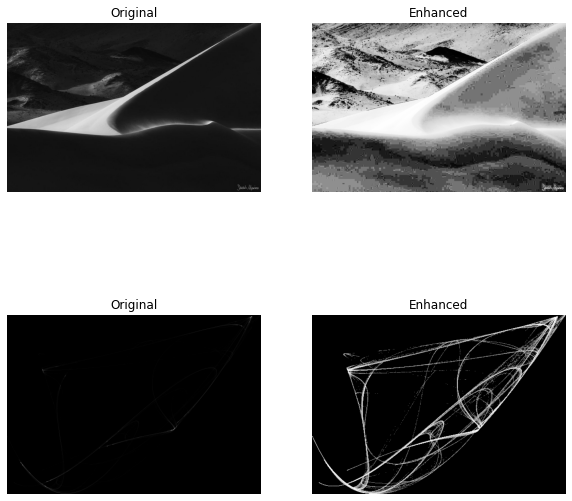

In [55]:
prac_raw = cv2.imread('../images/practice_range1.jpg')
prac = cv2.cvtColor(prac_raw,cv2.COLOR_BGR2GRAY)
prac_heq = histEqualization(prac)

hist_raw = cv2.imread('../images/hist.jpg')
hist = cv2.cvtColor(hist_raw,cv2.COLOR_BGR2GRAY)
hist_heq = histEqualization(hist)

fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(2,2,1)
ax.set_title('Original')
ax.imshow(prac,cmap='gray')
plt.axis('off')

ax = fig.add_subplot(2,2,2)
ax.set_title('Enhanced')
ax.imshow(prac_heq,cmap='gray')
plt.axis('off')

ax = fig.add_subplot(2,2,3)
ax.set_title('Original')
ax.imshow(hist,cmap='gray')
plt.axis('off')

ax = fig.add_subplot(2,2,4)
ax.set_title('Enhanced')
ax.imshow(hist_heq,cmap='gray')
plt.axis('off')
plt.show()

**Part IV**

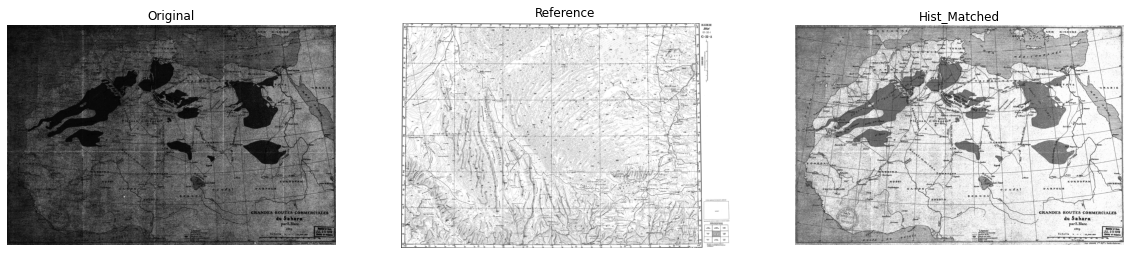

In [56]:
Map_raw = cv2.imread('../images/Map.jpg')
Map = cv2.cvtColor(Map_raw,cv2.COLOR_BGR2GRAY)

sat_raw = cv2.imread('../images/satellite_img.jpg')
sat = cv2.cvtColor(sat_raw,cv2.COLOR_BGR2GRAY)
out = histMatching(Map,sat)

fig=plt.figure(figsize=[20,20])
ax = fig.add_subplot(1,3,1)
ax.set_title('Original')
ax.imshow(Map,cmap='gray')
plt.axis('off')

ax = fig.add_subplot(1,3,2)
ax.set_title('Reference')
ax.imshow(sat,cmap='gray')
plt.axis('off')

ax = fig.add_subplot(1,3,3)
ax.set_title('Hist_Matched')
ax.imshow(out,cmap='gray')
plt.axis('off')
plt.show()

# Question 7

In [57]:
def piecewiseLinTransform(img,k1,k2,a,b):
    n_img = k1*img+k2
    n_img[img<a] = 0
    n_img[img>b] = 0
    return n_img

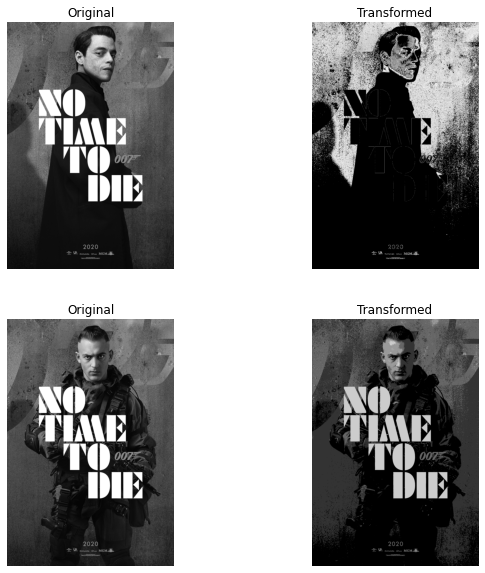

In [58]:
b1_raw = cv2.imread('../images/bondvillain1.jpg')
b1 = cv2.cvtColor(b1_raw,cv2.COLOR_BGR2GRAY)

k1 = np.array([0, 4/3,-2, 0])
k2 = np.array([0, 0.3, 2, 0])
a = np.array([0 , 0.3, 0.6,0.8])
b = np.array([0.3,0.6, 0.8,1])

res_b1 = np.zeros(b1.shape)
for i in range(k1.size):
  out=piecewiseLinTransform(b1/255,k1[i],k2[i],a[i],b[i])
  res_b1=res_b1+out

b2_raw = cv2.imread('../images/bondvillain2.jpg')
b2 = cv2.cvtColor(b2_raw,cv2.COLOR_BGR2GRAY)

k1_2 = np.array([ 0, 0, 0, 0,  0])
k2_2 = np.array([ 0,  0.2,  0.4,  0.6,  0.8 ])
a_2 = np.array([0,0.2,0.4,0.6,0.8])
b_2 = np.array([ 0.2,  0.4, 0.6,  0.8,  1])

res_b2 = np.zeros(b2.shape)
for i in range(k1_2.size):
  out = piecewiseLinTransform(b2/255,k1_2[i],k2_2[i],a_2[i],b_2[i])
  res_b2 = res_b2+out

fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(2,2,1)
ax.set_title('Original')
ax.imshow(b1,cmap='gray')
plt.axis('off')

ax = fig.add_subplot(2,2,2)
ax.set_title('Transformed')
ax.imshow((res_b1*255).astype(np.uint8),cmap='gray')
plt.axis('off')

ax = fig.add_subplot(2,2,3)
ax.set_title('Original')
ax.imshow(b2,cmap='gray')
plt.axis('off')

ax = fig.add_subplot(2,2,4)
ax.set_title('Transformed')
ax.imshow((res_b2*255).astype(np.uint8),cmap='gray')
plt.axis('off')
plt.show()

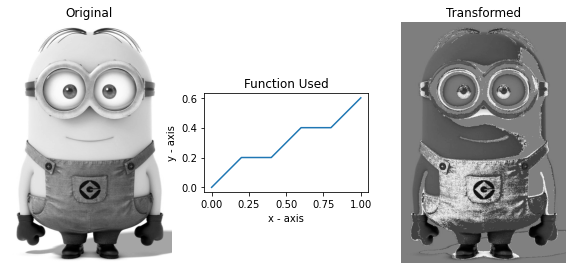

In [59]:
test_raw = cv2.imread('../images/7_3.jpg')
test = cv2.cvtColor(test_raw,cv2.COLOR_BGR2GRAY)

k1 = np.array([1, 0,1, 0,1])
k2 = np.array([0, 0.2, 0.2, 0.4,0.4])
a = np.array([0 , 0.2,0.4, 0.6,0.8])
b = np.array([0.2,0.4, 0.6,0.8,1])

line_x=[0,0.2,0.4,0.6,0.8,1]
line_y= [0,0.2,0.2,0.4,0.4,0.6]
res_test = np.zeros(test.shape)
for i in range(k1.size):
  out=piecewiseLinTransform(test/255,k1[i],k2[i],a[i],b[i])
  res_test=res_test+out

fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(1,3,1)
ax.set_title('Original')
ax.imshow(test,cmap='gray')
plt.axis('off')


ax = fig.add_subplot(1,3,2)
ax.set_title('Function Used')
plt.plot(line_x, line_y) 
ax.set_aspect('equal', adjustable='box')
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 


ax = fig.add_subplot(1,3,3)
ax.set_title('Transformed')
ax.imshow((res_test*255).astype(np.uint8),cmap='gray')
plt.axis('off')

plt.show()

# Question 8

**Part I**

In [60]:
def gammaTransform(img,gamma):
    out = np.power(img/255,gamma)*255
    return out.astype(np.uint8)

**Part II**

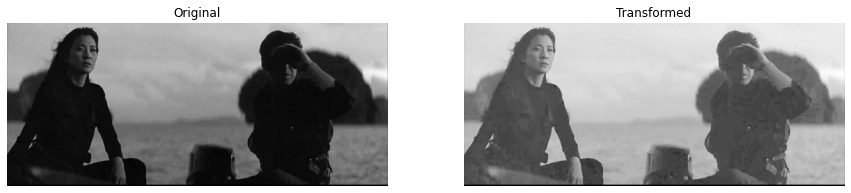

In [61]:
stealth_raw = cv2.imread('../images/stealth.png')
stealth = cv2.cvtColor(stealth_raw,cv2.COLOR_BGR2GRAY)
#p=1
#for i in range(1,52,2):
res = gammaTransform(stealth,0.4)


fig=plt.figure(figsize=[15,15])

ax = fig.add_subplot(1,2,1)
ax.set_title('Original')
ax.imshow(stealth,cmap='gray')
plt.axis('off') 

ax = fig.add_subplot(1,2,2)
ax.set_title('Transformed')
ax.imshow(res,cmap='gray')
plt.axis('off') 
plt.show()

**Part III**

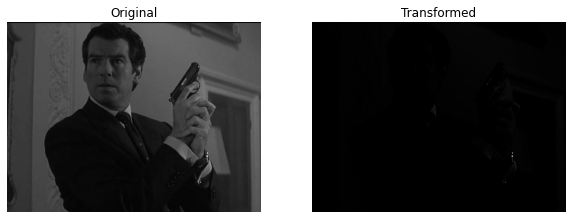

In [62]:
unstealth_raw = cv2.imread('../images/unstealth.png')
unstealth = cv2.cvtColor(unstealth_raw,cv2.COLOR_BGR2GRAY)
res2 = gammaTransform(unstealth,4)

fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(1,2,1)
ax.set_title('Original')
ax.imshow(unstealth,cmap='gray')
plt.axis('off') 

ax = fig.add_subplot(1,2,2)
ax.set_title('Transformed')
ax.imshow(res2,cmap='gray')
plt.axis('off')

plt.show()


**Part IV**

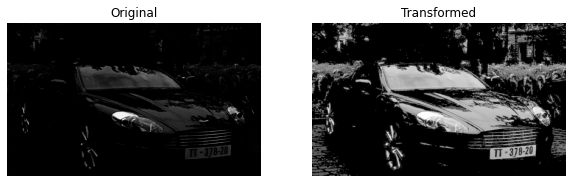

In [63]:
aston_raw = cv2.imread('../images/aston_invisible.jpg')
aston = cv2.cvtColor(aston_raw,cv2.COLOR_BGR2GRAY)
res3 = gammaTransform(aston,0.18)

fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(1,2,1)
ax.set_title('Original')
ax.imshow(aston,cmap='gray')
plt.axis('off') 

ax = fig.add_subplot(1,2,2)
ax.set_title('Transformed')
ax.imshow(res3,cmap='gray')
plt.axis('off')
plt.show()

# Question 9

In [64]:
j1_raw = cv2.imread('../images/james1.jpg')
j1 = cv2.cvtColor(j1_raw,cv2.COLOR_BGR2GRAY)
j2_raw = cv2.imread('../images/james2.jpg')
j2 = cv2.cvtColor(j2_raw,cv2.COLOR_BGR2GRAY)
j3_raw = cv2.imread('../images/james3.jpg')
j3 = cv2.cvtColor(j3_raw,cv2.COLOR_BGR2GRAY)
j4_raw = cv2.imread('../images/james4.jpg')
j4 = cv2.cvtColor(j4_raw,cv2.COLOR_BGR2GRAY)


a1 = np.concatenate((j1,j2),axis=1)
a2 = np.concatenate((j3,j4),axis=1)
final =np.concatenate((a1,a2),axis=0)

j1_old = histEqualization(j1)
j1_new = gammaTransform(j1_old,1.6)
j2_new = gammaTransform(j2,2)
j3_new = gammaTransform(j3,3)
j4_new = gammaTransform(j4,7)

a_1 = np.concatenate((j1_new,j2_new),axis=1)
a_2 = np.concatenate((j3_new,j4_new),axis=1)
res =np.concatenate((a_1,a_2),axis=0)


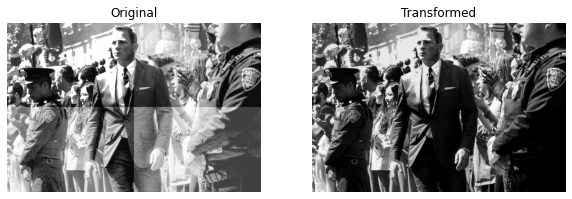

In [66]:

fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(1,2,1)
ax.set_title('Original')
ax.imshow(final,cmap='gray')
plt.axis('off')

ax = fig.add_subplot(1,2,2)
ax.set_title('Transformed')
ax.imshow(gammaTransform(res,0.8),cmap='gray')
plt.axis('off')
plt.show()